<a href="https://colab.research.google.com/github/Sonniah509/Demo-repo21/blob/master/regressionspotifyproblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration
**bold text***italicized text*

In [27]:
#Importing the basic librarires
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')


In [14]:
#import the dataset
! pip install -q kaggle
from google.colab import drive
drive.mount("/content/drive")
! mkdir ~/.kaggle


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [16]:
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [17]:
! chmod 600 ~/.kaggle/kaggle.json

Let's download the CS985/6 Spotify Regression Problem 2024 competition data.



In [22]:
!kaggle competitions download cs9856-spotify-regression-problem-2024

  0% 0.00/22.1k [00:00<?, ?B/s]
100% 22.1k/22.1k [00:00<00:00, 38.6MB/s]


In [23]:
# unzip the file
! unzip cs9856-spotify-regression-problem-2024.zip

Archive:  cs9856-spotify-regression-problem-2024.zip
  inflating: CS98XRegressionTest.csv  
  inflating: CS98XRegressionTrain.csv  


In [92]:
#read the Test CSV file into the data frame.
df = pd.read_csv('/content/CS98XRegressionTest.csv')
# Drop the 'Id' column from the DataFrame
df.drop(['Id'], axis=1, inplace=True)
# display some of the first rows of the data frame.
display(df.head(10))
#defining the target variable - in this case "bpm"
target = 'bpm'
#generate a list of all other features present apart from the the target.
features = [i for i in df.columns if i not in [target]]
# we are creating a deep copy of the original one.
original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3
5,You Keep Me Hangin On,Kim Wilde,dance pop,1986,123,68,69,-12,14,71,255,8,3
6,Mandy,Barry Manilow,adult standards,1974,104,46,31,-9,14,32,213,42,3
7,Collette,Billy Fury,adult standards,1982,155,44,55,-10,10,73,112,82,4
8,Against All Odds (Take a Look at Me Now) - 201...,Phil Collins,mellow gold,2016,116,50,58,-7,13,11,206,20,3
9,Highway to Hell,AC/DC,album rock,1979,116,91,57,-5,16,42,208,6,13



Inference: The Dataset consists of 13 features & 114 samples.


from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bpm'].plot(kind='hist', bins=20, title='bpm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['nrgy'].plot(kind='hist', bins=20, title='nrgy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['dnce'].plot(kind='hist', bins=20, title='dnce')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('top genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='year', y='bpm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bpm', y='nrgy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='nrgy', y='dnce', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='dnce', y='dB', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['bpm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('top genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='top genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('bpm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['nrgy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('top genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='top genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('nrgy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['dnce']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('top genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='top genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('dnce')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['dB']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('top genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='top genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('dB')

from matplotlib import pyplot as plt
_df_13['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['bpm'].plot(kind='line', figsize=(8, 4), title='bpm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['nrgy'].plot(kind='line', figsize=(8, 4), title='nrgy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['dnce'].plot(kind='line', figsize=(8, 4), title='dnce')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['top genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='year', y='top genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['top genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='bpm', y='top genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['top genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='nrgy', y='top genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['top genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='dnce', y='top genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

checking the data type of all the columns present

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      114 non-null    object
 1   artist     114 non-null    object
 2   top genre  113 non-null    object
 3   year       114 non-null    int64 
 4   bpm        114 non-null    int64 
 5   nrgy       114 non-null    int64 
 6   dnce       114 non-null    int64 
 7   dB         114 non-null    int64 
 8   live       114 non-null    int64 
 9   val        114 non-null    int64 
 10  dur        114 non-null    int64 
 11  acous      114 non-null    int64 
 12  spch       114 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 11.7+ KB


In [94]:
# Checking the number of unique column values to each of the features present.
# it calculates the number of unique values in each column and arranges them in an ascending order. This will help evaluate the diversity of all the values present in each column of our dataframe(df)
df.nunique().sort_values()


dB            18
spch          20
top genre     39
live          44
dnce          51
acous         52
year          54
nrgy          56
val           66
bpm           67
dur           86
artist       101
title        114
dtype: int64

In [106]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=50:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))
# Features with 20 or fewer unique values are considered categorical, and features with more than 20 unique values are considered numerical.
# the above helps to evaluate the total number of rows in each unique feature in the dataframe. It's important to recall that the dataset in the cs98xregressiontest set.


Inference: The Dataset has 8 numerical & 4 categorical features.


In [121]:
#Checking the stats of all the columns

display(df.describe())

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,1990.596491,122.342105,60.877193,58.921053,-8.964912,20.131579,58.368421,227.973684,31.078947,6.263158
std,16.545844,26.322650,22.950173,15.022782,3.957584,16.786801,24.286368,63.482345,29.963738,6.594517
min,1945.000000,64.000000,6.000000,26.000000,-22.000000,2.000000,11.000000,112.000000,0.000000,3.000000
25%,1978.250000,106.000000,44.000000,50.250000,-11.750000,10.000000,36.750000,184.250000,5.250000,3.000000
50%,1991.000000,120.000000,59.500000,57.500000,-8.000000,14.000000,61.500000,215.500000,19.500000,4.000000
75%,2005.750000,136.750000,80.000000,69.000000,-6.000000,24.000000,79.750000,264.000000,50.250000,6.000000
max,2019.000000,191.000000,98.000000,94.000000,-1.000000,90.000000,98.000000,444.000000,97.000000,47.000000


the stats of the test sample seem to be okay ; this means that we are free to explore and do more data analysis on the train set.

In [ ]:
#Eploratory Data Analysis (EDA)
#This is a fundamental step as it allows you to evaluate the properties, structure and the patterns of the dataset. The insight gained is useful in decision making and identifying any issues present. It is will also be useful in preprocessing and modelling.

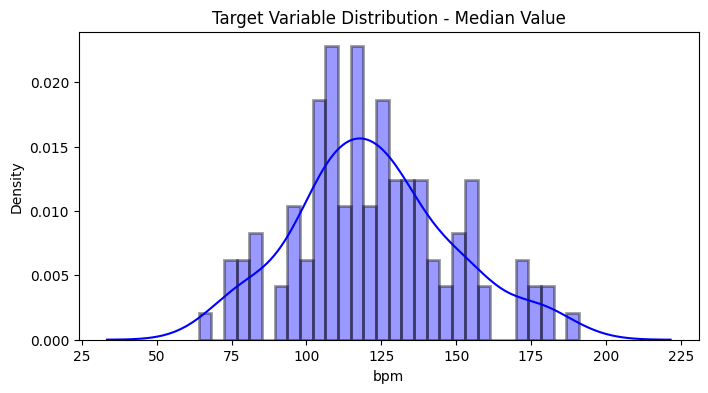

In [101]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value')
plt.show()


                               Visualising Categorical Features:                                


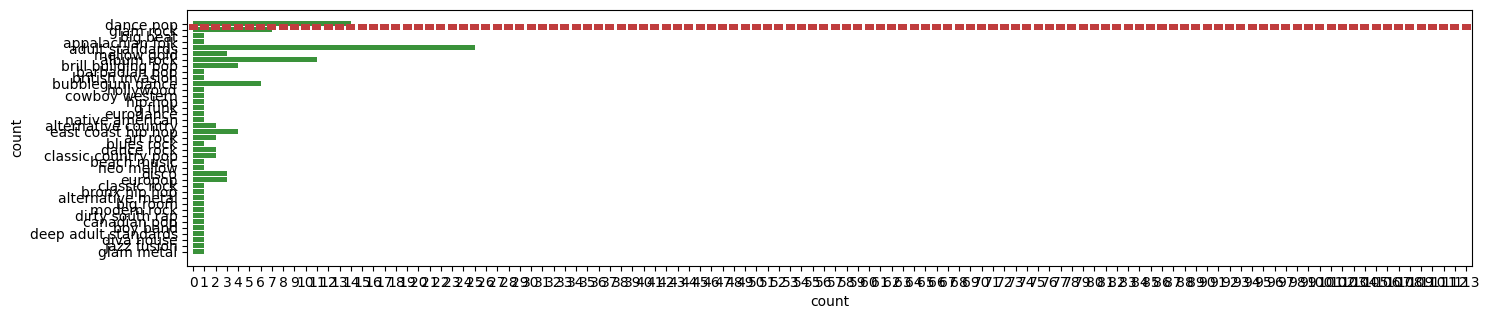

In [116]:
#visualizing categorical features
print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(2,1,2)
        sns.countplot(df[cf[i]])

plt.tight_layout()
plt.show()


                                 Numeric Features Distribution                                  


ValueError: could not convert string to float: 'The Black Eyed Peas'

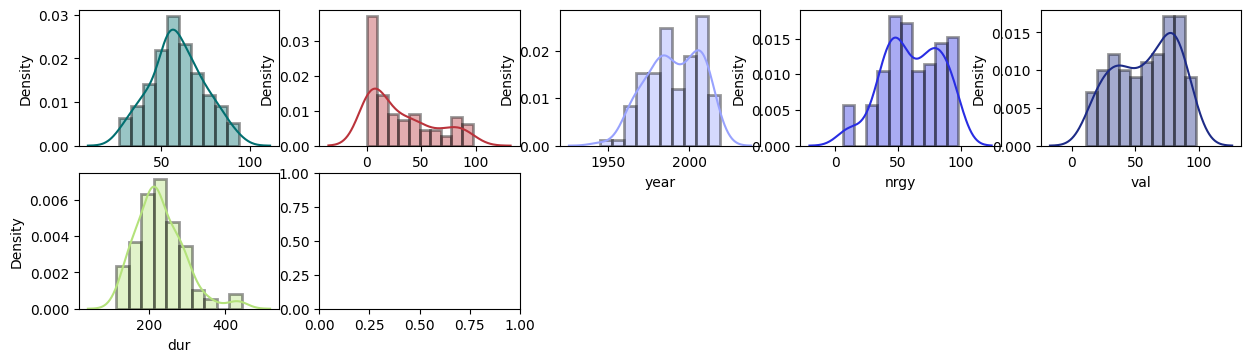

In [123]:
print('\033[1mNumeric Features Distribution'.center(100))

n=5

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])

for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

                                 Numeric Features Distribution                                  


ValueError: could not convert string to float: 'The Black Eyed Peas'

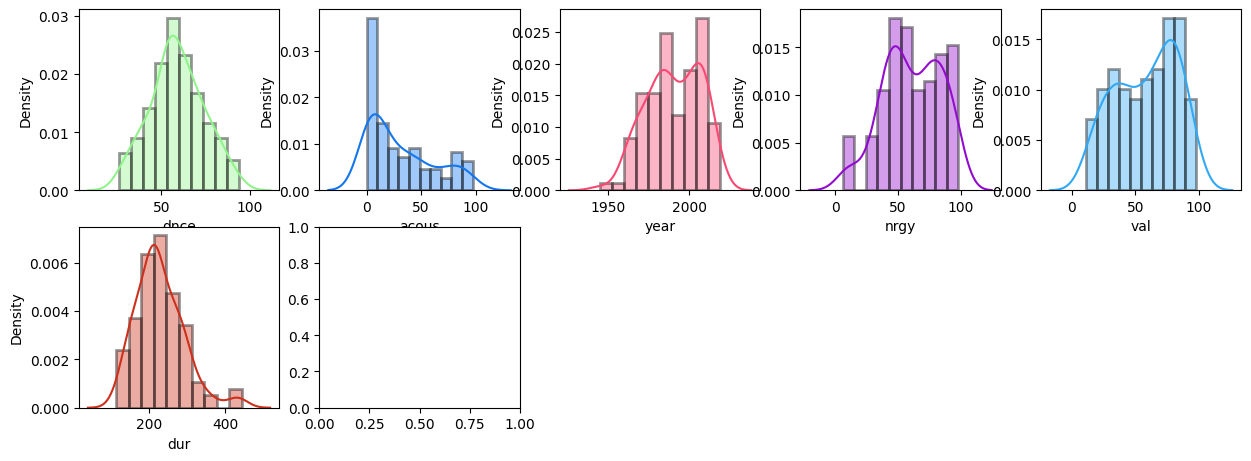

In [124]:
#visualization of numeric features
print('\033[1mNumeric Features Distribution'.center(100))

n=5

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

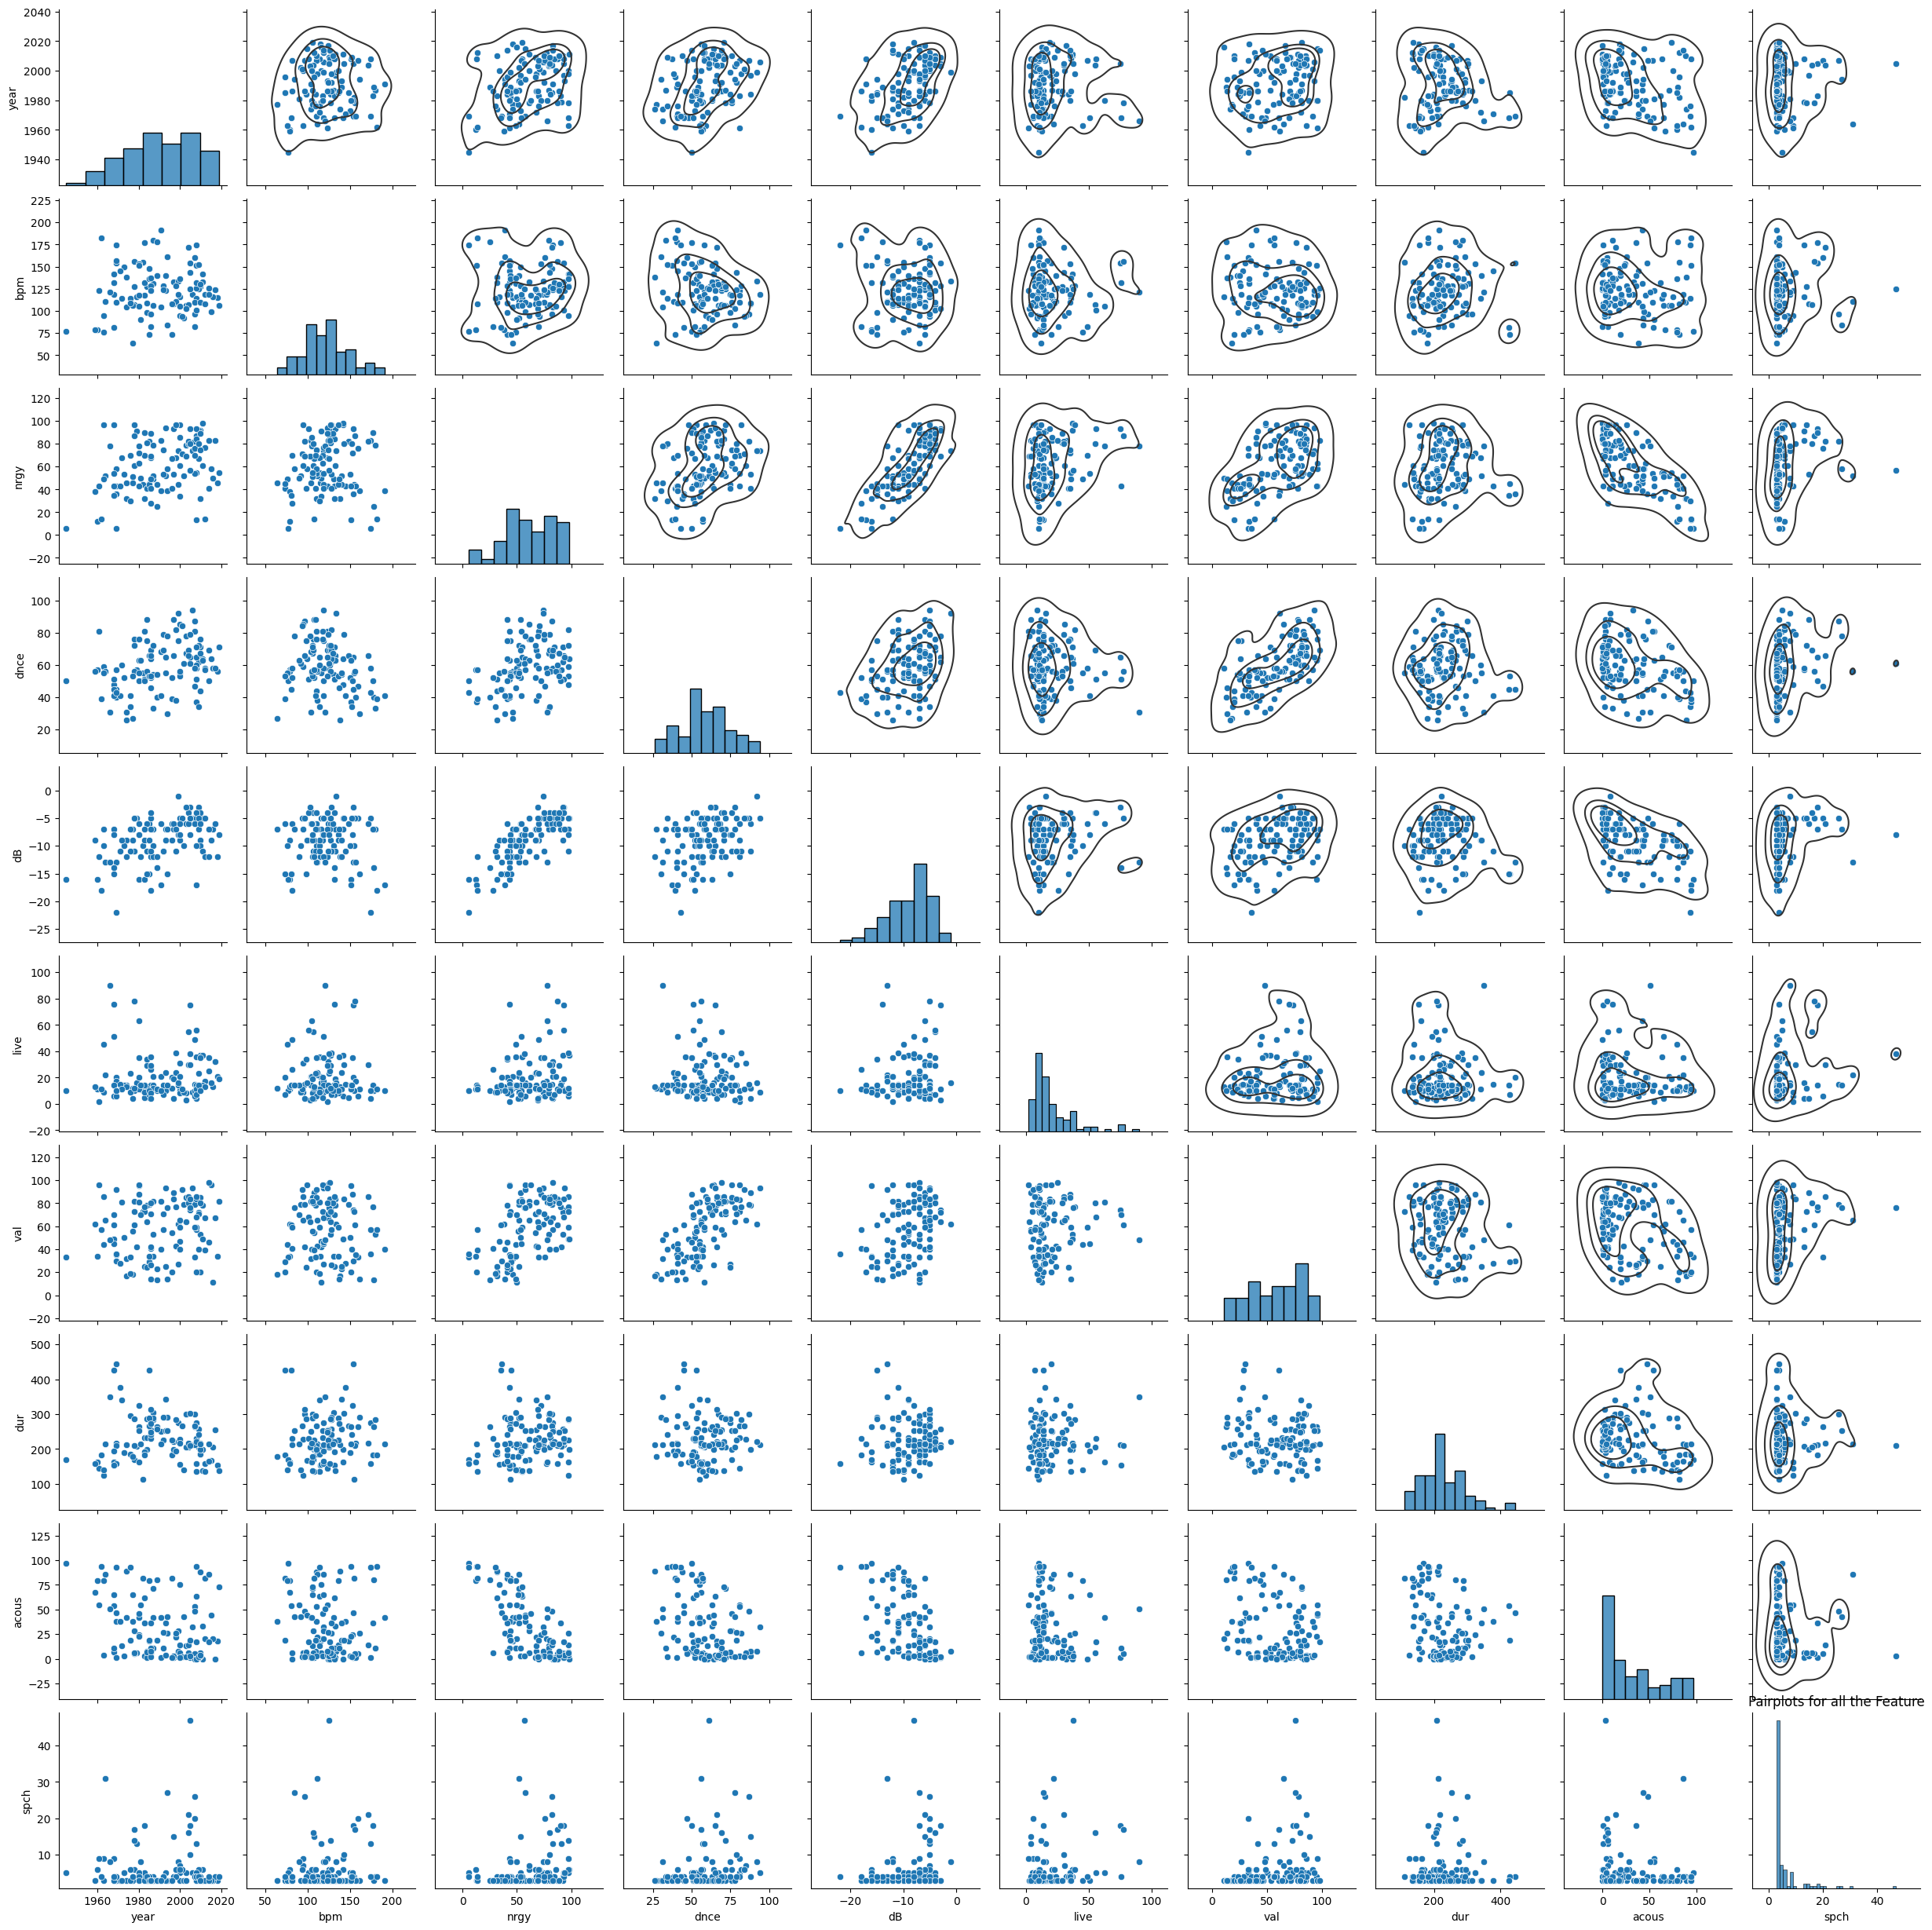

In [125]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [127]:
!kaggle competitions submit -c cs9856-spotify-regression-problem-2024 -f submission.csv -m "Message"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 801, in competition_submit_cli
    submit_result = self.competition_submit(file_name, message,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 752, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.10/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'submission.csv'
